In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request

In [2]:
!gdown 1CVJUTAVf4jdvf4NNA_EYrBVVPWVEc2C9

Downloading...
From: https://drive.google.com/uc?id=1CVJUTAVf4jdvf4NNA_EYrBVVPWVEc2C9
To: /content/comment_data_all.csv
100% 48.2M/48.2M [00:00<00:00, 60.2MB/s]


In [3]:
df = pd.read_csv('comment_data_all.csv', index_col=0)
df.drop(['month', 'page'], axis=1, inplace=True)
df

,comment,star
0,휘뚜루마뚜루 입고 다니기 좋습니다 로얄라이프제품들은 다 성공하는 듯!따숩고 예쁘기까...,5
1,어깨 깡패됩니다 기장감이나 털 재질 전체적으로 전부 맘에 들어요,5
2,바지 짱 편합니다ㅎㅎ 색깔도 너무 마음에 들고 핏도 좋네요,5
3,입기 편하고 후드 탈부착 돼서 여러 무드 연출하기도 쉽고 좋은데 가죽냄새랑 마감이 ...,4
4,유니폼 브릿지 발마칸 코트! 세일.기간중 저렴하게 겟겟! 최고 말모말모,5
...,...,...
344135,가방이 아주 포인트 그 자체라서 빤딱하고 너무 좋아요,5
344136,보들보둘하고 사이즈도 괜찮고 색도 이쁘게 잘나왔음,5
344137,생각보다 클 줄 알고 샀다가 조금 작았네요 그래도 좋아요,4
344138,생각보다 색상이 밝고 사이즈는 조금 작게 나온거 같아요.길이는 좀 길지만 수선안하고...,5


In [4]:
five = df[df['star'] == 5]
four = df[df['star'] == 4]
three = df[df['star'] == 3]
two = df[df['star'] == 2]
one = df[df['star'] == 1]

In [5]:
print(len(five))
print(len(four))
print(len(three))               
print(len(two))                
print(len(one))

298540
39242
5332
563
463


# 긍정, 부정 분할 후 라벨링

In [6]:
pos = df[df['star'] == 5] #298,540
nag = df[df['star'] < 5] #45,600

In [7]:
pos['label'] = 1
nag['label'] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# 데이터셋 수 통일 (랜덤으로 하고 싶으면 아래 .sample 코드사용)

In [8]:
pos = pos.iloc[:45000] # 이 부분만 데이터에 맞게 조정하면 됩니다
nag = nag.iloc[:45000]

# Train, Test 데이터셋 분리

In [9]:
pos_train = pos.sample(frac=0.8, random_state=3000)
pos_test = pos.drop(pos_train.index)

In [10]:
nag_train = nag.sample(frac=0.8, random_state=3000)
nag_test = nag.drop(nag_train.index)

In [11]:
train = pd.concat([pos_train, nag_train]).reset_index().drop(['index','star'], axis=1) # 72,000
test = pd.concat([pos_test, nag_test]).reset_index().drop(['index','star'], axis=1) # 18,000

In [12]:
train

,comment,label
0,디자인도 맘에 들고 가격은 좀 있지만 넓고 만족스러워요,1
1,덩치가 커서 맞는 옷이 잘 없는데도 제가 입어도 크네요! 편하게 입기 너무 좋아요....,1
2,지금 당장 캠퍼스를 활보하고싶은 디자인입니다. 스프링이 약한거만 빼면 다좋습니다.,1
3,잘 안알려진 맛집 찾아버렸다 냄새난다는데 초반엔 심하고 입다보면 안나요 이쁨,1
4,생각했던 딥그레이 색상이 잘 나와서 마음에 듭니다. 생각보다는 기장이 길기는 한데 ...,1
...,...,...
71995,가격이 저렴하고 편하게 스타일링 하기 정말 좋습니다. 하지만 먼지나 보폴같은게 많...,0
71996,뒷부분이 너무 이뻐요 소재가 두꺼워서 손이 잘안갈듯,0
71997,제 신체 스펙에 적당한 사이즈의 오버핏이며 지금인 늦 겨울에 딱 입기 알맞은 두께감입니다,0
71998,기본템으로 무난무난 예쁜데 머리가 좀 납작해보여서 아쉬워요 그래도 싸게 주고 사서 ...,0


In [13]:
train.nunique(), test.nunique()

(comment    72000
 label          2
 dtype: int64, comment    18000
 label          2
 dtype: int64)

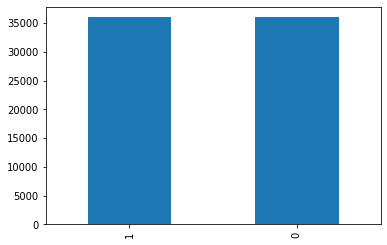

In [14]:
train['label'].value_counts().plot(kind = 'bar')

In [15]:
print(train.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0  36000
1      1  36000


In [16]:
# Hugging Face의 트랜스포머 모델을 설치
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 8.4 MB/s 
     |████████████████████████████████| 86 kB 4.2 MB/s 
     |████████████████████████████████| 6.6 MB 54.9 MB/s 
     |████████████████████████████████| 596 kB 54.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [17]:
import tensorflow as tf
import torch

from transformers import BertTokenizer
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import random
import time
import datetime

In [20]:
train.head(10)

,comment,label
0,디자인도 맘에 들고 가격은 좀 있지만 넓고 만족스러워요,1
1,덩치가 커서 맞는 옷이 잘 없는데도 제가 입어도 크네요! 편하게 입기 너무 좋아요....,1
2,지금 당장 캠퍼스를 활보하고싶은 디자인입니다. 스프링이 약한거만 빼면 다좋습니다.,1
3,잘 안알려진 맛집 찾아버렸다 냄새난다는데 초반엔 심하고 입다보면 안나요 이쁨,1
4,생각했던 딥그레이 색상이 잘 나와서 마음에 듭니다. 생각보다는 기장이 길기는 한데 ...,1
5,편하고 핏도 마음에 들어요 근데 수선을 않하면 못입을 정도로 크긴하네요 수선 추천드릴게요,1
6,막 걸쳐입을수 있는 맨투맨입니다 싸게사서 더좋네요,1
7,드디어 캠핑을 가서 사용했습니다. 정말 이쁘더군요. 사람들이 왜 돈들여서 화로대를 ...,1
8,핏감좋고 착용감좋고 재질도 좋은거 같아요. 역시 좋슴다,1
9,따뜻하니 겨울에 입고다니기 정말 좋은거같아요,1


# 전처리 - 훈련셋

In [24]:
# 리뷰 문장 추출
sentences = train['comment']
sentences[:10]

0                       디자인도 맘에 들고 가격은 좀 있지만 넓고 만족스러워요
1    덩치가 커서 맞는 옷이 잘 없는데도 제가 입어도 크네요! 편하게 입기 너무 좋아요....
2        지금 당장 캠퍼스를 활보하고싶은 디자인입니다. 스프링이 약한거만 빼면 다좋습니다.
3           잘 안알려진 맛집 찾아버렸다 냄새난다는데 초반엔 심하고 입다보면 안나요 이쁨
4    생각했던 딥그레이 색상이 잘 나와서 마음에 듭니다. 생각보다는 기장이 길기는 한데 ...
5    편하고 핏도 마음에 들어요 근데 수선을 않하면 못입을 정도로 크긴하네요 수선 추천드릴게요
6                          막 걸쳐입을수 있는 맨투맨입니다 싸게사서 더좋네요
7    드디어 캠핑을 가서 사용했습니다. 정말 이쁘더군요. 사람들이 왜 돈들여서 화로대를 ...
8                       핏감좋고 착용감좋고 재질도 좋은거 같아요. 역시 좋슴다
9                             따뜻하니 겨울에 입고다니기 정말 좋은거같아요
Name: comment, dtype: object

In [25]:
# BERT의 입력 형식에 맞게 변환
sentences = ["[CLS] " + str(sentence) + " [SEP]" for sentence in sentences]
sentences[:10]

['[CLS] 디자인도 맘에 들고 가격은 좀 있지만 넓고 만족스러워요 [SEP]',
 '[CLS] 덩치가 커서 맞는 옷이 잘 없는데도 제가 입어도 크네요! 편하게 입기 너무 좋아요. 얇아서 이거 한장만 입긴 힘들거 같아요 [SEP]',
 '[CLS] 지금 당장 캠퍼스를 활보하고싶은 디자인입니다. 스프링이 약한거만 빼면 다좋습니다. [SEP]',
 '[CLS] 잘 안알려진 맛집 찾아버렸다 냄새난다는데 초반엔 심하고 입다보면 안나요 이쁨 [SEP]',
 '[CLS] 생각했던 딥그레이 색상이 잘 나와서 마음에 듭니다. 생각보다는 기장이 길기는 한데 접어 입어도 좋고 조금 수선해도 예쁠 것 같아요! [SEP]',
 '[CLS] 편하고 핏도 마음에 들어요 근데 수선을 않하면 못입을 정도로 크긴하네요 수선 추천드릴게요 [SEP]',
 '[CLS] 막 걸쳐입을수 있는 맨투맨입니다 싸게사서 더좋네요 [SEP]',
 '[CLS] 드디어 캠핑을 가서 사용했습니다. 정말 이쁘더군요. 사람들이 왜 돈들여서 화로대를 좋은거 사나했더랍니다. 이제 다시 돌아가긴 틀린것같아요 불멍 다운 불멍을  해보니, 최고에요!! [SEP]',
 '[CLS] 핏감좋고 착용감좋고 재질도 좋은거 같아요. 역시 좋슴다 [SEP]',
 '[CLS] 따뜻하니 겨울에 입고다니기 정말 좋은거같아요 [SEP]']

In [26]:
# 라벨 추출
labels = train['label'].values
labels

array([1, 1, 1, ..., 0, 0, 0])

In [27]:
# BERT의 토크나이저로 문장을 토큰으로 분리
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)
tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

print (sentences[0])
print (tokenized_texts[0])

[CLS] 디자인도 맘에 들고 가격은 좀 있지만 넓고 만족스러워요 [SEP]
['[CLS]', '디', '##자인', '##도', '맘', '##에', '들', '##고', '가', '##격', '##은', '좀', '있지만', '넓', '##고', '만', '##족', '##스', '##러', '##워', '##요', '[SEP]']


In [28]:
# 입력 토큰의 최대 시퀀스 길이
MAX_LEN = 128

# 토큰을 숫자 인덱스로 변환
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]

# 문장을 MAX_LEN 길이에 맞게 자르고, 모자란 부분을 패딩 0으로 채움
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

input_ids[0]

array([  101,  9122, 86150, 12092,  9253, 10530,  9117, 11664,  8843,
       45465, 10892,  9682, 76123,  9007, 11664,  9248, 52560, 12605,
       30873, 69592, 48549,   102,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0]

In [29]:
# 어텐션 마스크 초기화
attention_masks = []

# 어텐션 마스크를 패딩이 아니면 1, 패딩이면 0으로 설정
# 패딩 부분은 BERT 모델에서 어텐션을 수행하지 않아 속도 향상
for seq in input_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)

print(attention_masks[0])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [30]:
# 훈련셋과 검증셋으로 분리
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids,
                                                                                    labels, 
                                                                                    random_state=2018, 
                                                                                    test_size=0.1)

# 어텐션 마스크를 훈련셋과 검증셋으로 분리
train_masks, validation_masks, _, _ = train_test_split(attention_masks, 
                                                       input_ids,
                                                       random_state=2018, 
                                                       test_size=0.1)

# 데이터를 파이토치의 텐서로 변환
train_inputs = torch.tensor(train_inputs)
train_labels = torch.tensor(train_labels)
train_masks = torch.tensor(train_masks)
validation_inputs = torch.tensor(validation_inputs)
validation_labels = torch.tensor(validation_labels)
validation_masks = torch.tensor(validation_masks)				

print(train_inputs[0])
print(train_labels[0])
print(train_masks[0])
print(validation_inputs[0])
print(validation_labels[0])
print(validation_masks[0])

tensor([   101,   9186,  86732,  15001,   9952,  33797,   8932,  13890, 105197,
         12092,   9131,   9256,  11664,   9012,  14646,  37712,  12092,   9847,
         66554,  14523,  48549,    102,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0, 

In [31]:
# 배치 사이즈
batch_size = 32

# 파이토치의 DataLoader로 입력, 마스크, 라벨을 묶어 데이터 설정
# 학습시 배치 사이즈 만큼 데이터를 가져옴
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

# 전처리 - 테스트셋

In [32]:
# 리뷰 문장 추출
sentences = test['comment']
sentences[:10]

0                     바지 짱 편합니다ㅎㅎ 색깔도 너무 마음에 들고 핏도 좋네요
1                크롭이라 너무 짧긴하지만 팔길이도 적당하고 기모라 따뜻해서 좋아요.
2    핏이 넘모 이뻐요 좀 얇아서 히트텍이랑 입어야 됩니당 편하고 해서 받고 사일동안 오...
3                      데이지 자수가 이뻐요 옷입을때 포인트 주기 좋을거 같아요
4                             무신사스텐다드 반팔티 레이어드하기 딱좋습니다
5                        너무  좋습니다  엑스트라오디너리  믿고 사는 브랜드
6                  딸아이 교복에 입으려고 구입했어요 색상도 좋고 스포티해서 좋아요
7                     사이즈 큼직하고 오버합니다 디자인 이쁘고 색상도 딱좋아요!
8     친한동생이 입고있어서 이뻐서 따라샀는데 역시 너무 이쁘네요 시보리도 짱짱하고 따뜻합니다
9         싸게 사서 일이나 운동할 때 살 신고 있습니다 뭐..많이 신었어요 사진은 ㅎㅎ;
Name: comment, dtype: object

In [33]:
# BERT의 입력 형식에 맞게 변환
sentences = ["[CLS] " + str(sentence) + " [SEP]" for sentence in sentences]
sentences[:10]

['[CLS] 바지 짱 편합니다ㅎㅎ 색깔도 너무 마음에 들고 핏도 좋네요 [SEP]',
 '[CLS] 크롭이라 너무 짧긴하지만 팔길이도 적당하고 기모라 따뜻해서 좋아요. [SEP]',
 '[CLS] 핏이 넘모 이뻐요 좀 얇아서 히트텍이랑 입어야 됩니당 편하고 해서 받고 사일동안 오지게 입었네용 [SEP]',
 '[CLS] 데이지 자수가 이뻐요 옷입을때 포인트 주기 좋을거 같아요 [SEP]',
 '[CLS] 무신사스텐다드 반팔티 레이어드하기 딱좋습니다 [SEP]',
 '[CLS] 너무  좋습니다  엑스트라오디너리  믿고 사는 브랜드 [SEP]',
 '[CLS] 딸아이 교복에 입으려고 구입했어요 색상도 좋고 스포티해서 좋아요 [SEP]',
 '[CLS] 사이즈 큼직하고 오버합니다 디자인 이쁘고 색상도 딱좋아요! [SEP]',
 '[CLS] 친한동생이 입고있어서 이뻐서 따라샀는데 역시 너무 이쁘네요 시보리도 짱짱하고 따뜻합니다 [SEP]',
 '[CLS] 싸게 사서 일이나 운동할 때 살 신고 있습니다 뭐..많이 신었어요 사진은 ㅎㅎ; [SEP]']

In [34]:
# 라벨 추출
labels = test['label'].values
labels

array([1, 1, 1, ..., 0, 0, 0])

In [35]:
# BERT의 토크나이저로 문장을 토큰으로 분리
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)
tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

print (sentences[0])
print (tokenized_texts[0])

[CLS] 바지 짱 편합니다ㅎㅎ 색깔도 너무 마음에 들고 핏도 좋네요 [SEP]
['[CLS]', '바', '##지', '짱', '[UNK]', '색', '##깔', '##도', '너', '##무', '마', '##음', '##에', '들', '##고', '[UNK]', '좋', '##네', '##요', '[SEP]']


In [39]:
# 입력 토큰의 최대 시퀀스 길이
MAX_LEN = 128

# 토큰을 숫자 인덱스로 변환
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]

# 문장을 MAX_LEN 길이에 맞게 자르고, 모자란 부분을 패딩 0으로 채움
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

input_ids[0]

array([   101,   9318,  12508,   9718,    100,   9416, 118674,  12092,
         9004,  32537,   9246,  32158,  10530,   9117,  11664,    100,
         9685,  77884,  48549,    102,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

In [40]:
# 어텐션 마스크 초기화
attention_masks = []

# 어텐션 마스크를 패딩이 아니면 1, 패딩이면 0으로 설정
# 패딩 부분은 BERT 모델에서 어텐션을 수행하지 않아 속도 향상
for seq in input_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)

print(attention_masks[0])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [45]:
# 데이터를 파이토치의 텐서로 변환
test_inputs = torch.tensor(input_ids)
test_labels = torch.tensor(labels)
test_masks = torch.tensor(attention_masks)

print(test_inputs[0])
print(test_labels[0])
print(test_masks[0])

tensor([   101,   9318,  12508,   9718,    100,   9416, 118674,  12092,   9004,
         32537,   9246,  32158,  10530,   9117,  11664,    100,   9685,  77884,
         48549,    102,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0, 

In [46]:
# 배치 사이즈
batch_size = 32

# 파이토치의 DataLoader로 입력, 마스크, 라벨을 묶어 데이터 설정
# 학습시 배치 사이즈 만큼 데이터를 가져옴
test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = RandomSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

# 모델 생성

In [47]:
# GPU 디바이스 이름 구함
device_name = tf.test.gpu_device_name()

# GPU 디바이스 이름 검사
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [48]:
# 디바이스 설정
if torch.cuda.is_available():    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print('No GPU available, using the CPU instead.')

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [49]:
# 분류를 위한 BERT 모델 생성
model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=2)
model.cuda()

Downloading:   0%|          | 0.00/681M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [61]:
# 옵티마이저 설정
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # 학습률
                  eps = 1e-8 # 0으로 나누는 것을 방지하기 위한 epsilon 값
                )

# 에폭수
epochs = 10

# 총 훈련 스텝 : 배치반복 횟수 * 에폭
total_steps = len(train_dataloader) * epochs

# 처음에 학습률을 조금씩 변화시키는 스케줄러 생성
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


# 모델 학습

In [62]:
# 정확도 계산 함수
def flat_accuracy(preds, labels):
    
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [63]:
# 시간 표시 함수
def format_time(elapsed):

    # 반올림
    elapsed_rounded = int(round((elapsed)))
    
    # hh:mm:ss으로 형태 변경
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [64]:
# 재현을 위해 랜덤시드 고정
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# 그래디언트 초기화
model.zero_grad()

# 에폭만큼 반복
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # 시작 시간 설정
    t0 = time.time()

    # 로스 초기화
    total_loss = 0

    # 훈련모드로 변경
    model.train()
        
    # 데이터로더에서 배치만큼 반복하여 가져옴
    for step, batch in enumerate(train_dataloader):
        # 경과 정보 표시
        if step % 500 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # 배치를 GPU에 넣음
        batch = tuple(t.to(device) for t in batch)
        
        # 배치에서 데이터 추출
        b_input_ids, b_input_mask, b_labels = batch

        # Forward 수행                
        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask, 
                        labels=b_labels)
        
        # 로스 구함
        loss = outputs[0]

        # 총 로스 계산
        total_loss += loss.item()

        # Backward 수행으로 그래디언트 계산
        loss.backward()

        # 그래디언트 클리핑
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # 그래디언트를 통해 가중치 파라미터 업데이트
        optimizer.step()

        # 스케줄러로 학습률 감소
        scheduler.step()

        # 그래디언트 초기화
        model.zero_grad()

    # 평균 로스 계산
    avg_train_loss = total_loss / len(train_dataloader)            

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================

    print("")
    print("Running Validation...")

    #시작 시간 설정
    t0 = time.time()

    # 평가모드로 변경
    model.eval()

    # 변수 초기화
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # 데이터로더에서 배치만큼 반복하여 가져옴
    for batch in validation_dataloader:
        # 배치를 GPU에 넣음
        batch = tuple(t.to(device) for t in batch)
        
        # 배치에서 데이터 추출
        b_input_ids, b_input_mask, b_labels = batch
        
        # 그래디언트 계산 안함
        with torch.no_grad():     
            # Forward 수행
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # 출력 로짓 구함
        logits = outputs[0]

        # CPU로 데이터 이동
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # 출력 로짓과 라벨을 비교하여 정확도 계산
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1

    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 10 ========
Training...
  Batch   500  of    507.    Elapsed: 0:03:10.

  Average training loss: 0.52
  Training epcoh took: 0:03:12

Running Validation...
  Accuracy: 0.67
  Validation took: 0:00:06

======== Epoch 2 / 10 ========
Training...
  Batch   500  of    507.    Elapsed: 0:03:10.

  Average training loss: 0.41
  Training epcoh took: 0:03:12

Running Validation...
  Accuracy: 0.66
  Validation took: 0:00:06

======== Epoch 3 / 10 ========
Training...
  Batch   500  of    507.    Elapsed: 0:03:10.

  Average training loss: 0.34
  Training epcoh took: 0:03:12

Running Validation...
  Accuracy: 0.63
  Validation took: 0:00:06

======== Epoch 4 / 10 ========
Training...
  Batch   500  of    507.    Elapsed: 0:03:10.

  Average training loss: 0.33
  Training epcoh took: 0:03:12

Running Validation...
  Accuracy: 0.63
  Validation took: 0:00:06

======== Epoch 5 / 10 ========
Training...
  Batch   500  of    507.    Elapsed: 0:03:10.

  Average training loss: 0.3

# 테스트셋 평가

In [65]:
#시작 시간 설정
t0 = time.time()

# 평가모드로 변경
model.eval()

# 변수 초기화
eval_loss, eval_accuracy = 0, 0
nb_eval_steps, nb_eval_examples = 0, 0

# 데이터로더에서 배치만큼 반복하여 가져옴
for step, batch in enumerate(test_dataloader):
    # 경과 정보 표시
    if step % 100 == 0 and not step == 0:
        elapsed = format_time(time.time() - t0)
        print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(test_dataloader), elapsed))

    # 배치를 GPU에 넣음
    batch = tuple(t.to(device) for t in batch)
    
    # 배치에서 데이터 추출
    b_input_ids, b_input_mask, b_labels = batch
    
    # 그래디언트 계산 안함
    with torch.no_grad():     
        # Forward 수행
        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask)
    
    # 출력 로짓 구함
    logits = outputs[0]

    # CPU로 데이터 이동
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    
    # 출력 로짓과 라벨을 비교하여 정확도 계산
    tmp_eval_accuracy = flat_accuracy(logits, label_ids)
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1

print("")
print("Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
print("Test took: {:}".format(format_time(time.time() - t0)))

  Batch   100  of    563.    Elapsed: 0:00:12.
  Batch   200  of    563.    Elapsed: 0:00:23.
  Batch   300  of    563.    Elapsed: 0:00:35.
  Batch   400  of    563.    Elapsed: 0:00:46.
  Batch   500  of    563.    Elapsed: 0:00:58.

Accuracy: 0.96
Test took: 0:01:05


# 새로운 문장 테스트

In [66]:
# 입력 데이터 변환
def convert_input_data(sentences):

    # BERT의 토크나이저로 문장을 토큰으로 분리
    tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

    # 입력 토큰의 최대 시퀀스 길이
    MAX_LEN = 128

    # 토큰을 숫자 인덱스로 변환
    input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
    
    # 문장을 MAX_LEN 길이에 맞게 자르고, 모자란 부분을 패딩 0으로 채움
    input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

    # 어텐션 마스크 초기화
    attention_masks = []

    # 어텐션 마스크를 패딩이 아니면 1, 패딩이면 0으로 설정
    # 패딩 부분은 BERT 모델에서 어텐션을 수행하지 않아 속도 향상
    for seq in input_ids:
        seq_mask = [float(i>0) for i in seq]
        attention_masks.append(seq_mask)

    # 데이터를 파이토치의 텐서로 변환
    inputs = torch.tensor(input_ids)
    masks = torch.tensor(attention_masks)

    return inputs, masks

In [67]:
# 문장 테스트
def test_sentences(sentences):

    # 평가모드로 변경
    model.eval()

    # 문장을 입력 데이터로 변환
    inputs, masks = convert_input_data(sentences)

    # 데이터를 GPU에 넣음
    b_input_ids = inputs.to(device)
    b_input_mask = masks.to(device)
            
    # 그래디언트 계산 안함
    with torch.no_grad():     
        # Forward 수행
        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask)

    # 출력 로짓 구함
    logits = outputs[0]

    # CPU로 데이터 이동
    logits = logits.detach().cpu().numpy()

    return logits

In [68]:
logit = test_sentences(['이쁩니다 절개디테일이 있어서 안심심하네요 추천합니다']) # 기존 5점

print(logits)
print(np.argmax(logits))

[[ 0.5179805 -0.998993 ]
 [ 3.9820218 -3.3740156]
 [-3.156609   2.2718387]
 [-3.5837388  2.4538698]
 [ 3.65174   -3.3027687]
 [-2.7845368  1.8626267]
 [-2.7894688  2.1935997]
 [ 2.4272916 -2.4925742]
 [-3.9010863  3.5390859]
 [ 3.3730915 -3.3452513]
 [ 3.8397384 -3.4357095]
 [-3.9163632  3.5295644]
 [-2.9541621  2.7230744]
 [ 3.4861386 -3.0363452]
 [-3.5888426  3.071887 ]
 [-4.1192575  3.623753 ]]
2


In [69]:
logit = test_sentences(['이런 옷 처음 사보는데 어떻게 매치해서 입어야할지 고민... 그냥 딱 노랑노랑한 무슨 농구복같은 느낌 ㅎㅎㅎ']) # 기존 3점

print(logits)
print(np.argmax(logits))

[[ 0.5179805 -0.998993 ]
 [ 3.9820218 -3.3740156]
 [-3.156609   2.2718387]
 [-3.5837388  2.4538698]
 [ 3.65174   -3.3027687]
 [-2.7845368  1.8626267]
 [-2.7894688  2.1935997]
 [ 2.4272916 -2.4925742]
 [-3.9010863  3.5390859]
 [ 3.3730915 -3.3452513]
 [ 3.8397384 -3.4357095]
 [-3.9163632  3.5295644]
 [-2.9541621  2.7230744]
 [ 3.4861386 -3.0363452]
 [-3.5888426  3.071887 ]
 [-4.1192575  3.623753 ]]
2


In [70]:
logit = test_sentences(['별 하나도 아까움 사진으로 확인하세요 절대비추 앞판천은 괜찮은데 뒷판은 쪼글쪼글 뒷판을 안볼거라 생각한건지..']) # 기존 1점

print(logits)
print(np.argmax(logits))

[[ 0.5179805 -0.998993 ]
 [ 3.9820218 -3.3740156]
 [-3.156609   2.2718387]
 [-3.5837388  2.4538698]
 [ 3.65174   -3.3027687]
 [-2.7845368  1.8626267]
 [-2.7894688  2.1935997]
 [ 2.4272916 -2.4925742]
 [-3.9010863  3.5390859]
 [ 3.3730915 -3.3452513]
 [ 3.8397384 -3.4357095]
 [-3.9163632  3.5295644]
 [-2.9541621  2.7230744]
 [ 3.4861386 -3.0363452]
 [-3.5888426  3.071887 ]
 [-4.1192575  3.623753 ]]
2
